<a href="https://colab.research.google.com/github/kinyy999/kinan/blob/main/kinan_abusalh_ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Load breast cancer dataset (**structured data**)

For more details about the data: https://scikit-learn.org/1.5/modules/generated/sklearn.datasets.load_breast_cancer.html

In [ ]:

from sklearn.datasets import load_breast_cancer

my_data = load_breast_cancer()


2. Visualize the data

- Only **5 points** for visualizing the data
- Use TSNE algorithm: sklearn.manifold.TSNE
- A good and simple code can be found here (they used PCA instead of TSNE): https://skp2707.medium.com/pca-on-cancer-dataset-4d7a97f5fdb8

<ipython-input-3-62129be85d47>:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  tsne_df['Label'].replace(0.0, 'Malignant',inplace=True)


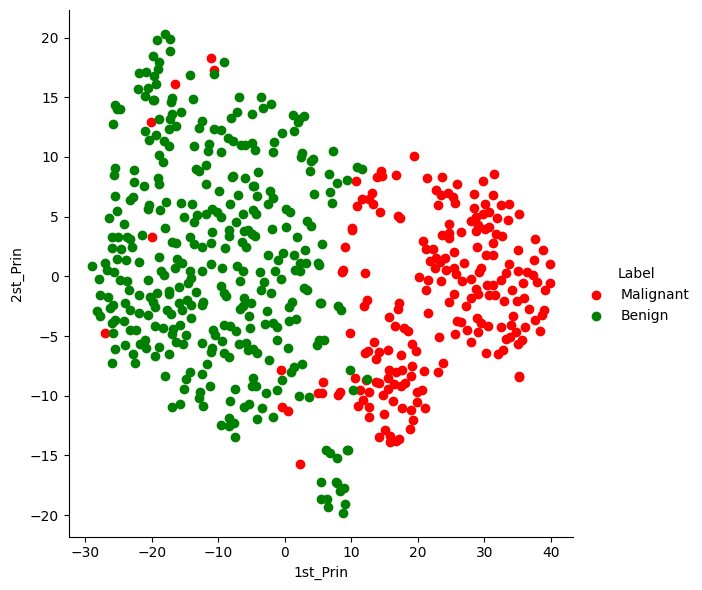

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


breast_cancer = load_breast_cancer()

breast_cancer.data.shape

breast_cancer.target.shape

raw_data = breast_cancer.data

normalized_data = StandardScaler().fit_transform(raw_data)

tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(normalized_data)


tsne_df = pd.DataFrame(np.vstack((tsne_result.T, breast_cancer.target)).T,
                          columns=['1st_Prin', '2st_Prin', 'Label'])


tsne_df['Label'].replace(0.0, 'Malignant',inplace=True)
tsne_df['Label'].replace(1.0, 'Benign',inplace=True)

tsne_df.value_counts()
# Create Plot
# Set palette of colors for different labels
pal = dict(Malignant="red", Benign="green")

ax = sns.FacetGrid(tsne_df, hue='Label', height=6, palette=pal,
                   hue_order=["Malignant", "Benign"]).\
                   map(plt.scatter, '1st_Prin', '2st_Prin').\
                   add_legend()

plt.show()




3. Split **my_data** to train and test:

- Define X_train, X_test, Y_train, Y_test
- Choose **test_size** for splitting **my_data**
- Use **train_test_split** (for details: https://scikit-learn.org/dev/modules/generated/sklearn.model_selection.train_test_split.html)

In [ ]:

from sklearn.model_selection import train_test_split
x = breast_cancer.data
y = breast_cancer.target

test_size = 0.25

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size)


4. Train **model_decision_tree**

- Library: sklearn.tree.DecisionTreeClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize DecisionTreeClassifier options   

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score


model_decision_tree = DecisionTreeClassifier(max_depth=1000 )
model_decision_tree.fit(x_train, y_train)
y_pred = model_decision_tree.predict(x_test)


print("accuracy_score=", accuracy_score(y_test, y_pred))
print("confusion_matrix=\n", confusion_matrix(y_test, y_pred))
print("precision_score=",precision_score(y_test, y_pred))
print("recall_score=",recall_score(y_test, y_pred))
print("f1_score=",f1_score(y_test, y_pred))



accuracy_score= 0.9230769230769231
confusion_matrix=
 [[51  3]
 [ 8 81]]
precision_score= 0.9642857142857143
recall_score= 0.9101123595505618
f1_score= 0.9364161849710982


5. Train model_random_forest
- Library: sklearn.ensemble.RandomForestClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize RandomForestClassifier options

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

model_random_forest = RandomForestClassifier(n_estimators=1, max_depth= None, criterion='gini',)
model_random_forest.fit(x_train, y_train)
y_pred = model_random_forest.predict(x_test)


print("accuracy_score=", accuracy_score(y_test, y_pred))
print("confusion_matrix=\n", confusion_matrix(y_test, y_pred))
print("precision_score=",precision_score(y_test, y_pred))
print("recall_score=",recall_score(y_test, y_pred))
print("f1_score=",f1_score(y_test, y_pred))

accuracy_score= 0.9440559440559441
confusion_matrix=
 [[53  1]
 [ 7 82]]
precision_score= 0.9879518072289156
recall_score= 0.9213483146067416
f1_score= 0.9534883720930233


6. Train model_adaboost

- Library: sklearn.ensemble.AdaBoostClassifier
- Data: X_train, Y_train
- **Essential**: explore and optimize AdaBoostClassifier options

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

model_adaboost = AdaBoostClassifier(n_estimators=100,learning_rate=0.1,algorithm='SAMME')
model_adaboost.fit(x_train, y_train)
y_pred = model_adaboost.predict(x_test)

print("accuracy_score=", accuracy_score(y_test, y_pred))
print("confusion_matrix=\n", confusion_matrix(y_test, y_pred))
print("precision_score=",precision_score(y_test, y_pred))
print("recall_score=",recall_score(y_test, y_pred))
print("f1_score=",f1_score(y_test, y_pred))

accuracy_score= 0.972027972027972
confusion_matrix=
 [[52  2]
 [ 2 87]]
precision_score= 0.9775280898876404
recall_score= 0.9775280898876404
f1_score= 0.9775280898876404


7. Evaluate model_decision_tree, model_random_forest, model_adaboost

- Library: sklearn.metrics
- Data: X_test, Y_test
- **Calculate** and **print** results of each classifier
- **Choose** the decisive metric
- **Compare** between the classifiers and declare the winner


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier


model_adaboost = AdaBoostClassifier(n_estimators=100,learning_rate=0.1,algorithm='SAMME.R')
model_adaboost.fit(x_train, y_train)
y_pred = model_adaboost.predict(x_test)

print("accuracy_score=", accuracy_score(y_test, y_pred))
print("confusion_matrix=\n", confusion_matrix(y_test, y_pred))
print("precision_score=",precision_score(y_test, y_pred))
print("recall_score=",recall_score(y_test, y_pred))
print("f1_score=",f1_score(y_test, y_pred))

print('-------------------------------------')

model_random_forest = RandomForestClassifier(n_estimators=100, max_depth= 50, criterion='gini')
model_random_forest.fit(x_train, y_train)
y_pred = model_random_forest.predict(x_test)

print("accuracy_score=", accuracy_score(y_test, y_pred))
print("confusion_matrix=\n", confusion_matrix(y_test, y_pred))
print("precision_score=",precision_score(y_test, y_pred))
print("recall_score=",recall_score(y_test, y_pred))
print("f1_score=",f1_score(y_test, y_pred))

print('-------------------------------------')
model_decision_tree = DecisionTreeClassifier(max_depth = 10, criterion = 'entropy')
model_decision_tree.fit(x_train, y_train)
y_pred = model_decision_tree.predict(x_test)

print("accuracy_score=", accuracy_score(y_test, y_pred))
print("confusion_matrix=\n", confusion_matrix(y_test, y_pred))
print("precision_score=",precision_score(y_test, y_pred))
print("recall_score=",recall_score(y_test, y_pred))
print("f1_score=",f1_score(y_test, y_pred))

print('adaboost f1score is the best one so it is the best classifier')





#

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


accuracy_score= 0.9790209790209791
confusion_matrix=
 [[52  2]
 [ 1 88]]
precision_score= 0.9777777777777777
recall_score= 0.9887640449438202
f1_score= 0.9832402234636871
-------------------------------------
accuracy_score= 0.965034965034965
confusion_matrix=
 [[52  2]
 [ 3 86]]
precision_score= 0.9772727272727273
recall_score= 0.9662921348314607
f1_score= 0.9717514124293786
-------------------------------------
accuracy_score= 0.9370629370629371
confusion_matrix=
 [[52  2]
 [ 7 82]]
precision_score= 0.9761904761904762
recall_score= 0.9213483146067416
f1_score= 0.9479768786127167
adaboost f1score is the best one so it is the best classifier
